# 0. Purpose of this notebook

 - Examine how `tgan` algorithm works
 
 - References:
     - [テーブルデータ向けのGAN（TGAN）で、titanicのデータを増やす!](https://upura.hatenablog.com/entry/2019/08/20/120000) (in Japanese)
         - Referred this site for executing tgan
     - [Implementation of tgan](https://github.com/DAI-Lab/TGAN)
     
- Environment:
    - Examined this notebook under python3.6 AzureML environment (Data Science VM)

- Major preparation:
    - `pip install tgan` and related packages like tensorflow etc.
    - Download titanic dataset from https://www.kaggle.com/c/titanic/data, and put `train.csv` into `./data`, after making the directory.

# 1. Preparation & execution of `tgan`

In [1]:
import os, sys

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

from tgan.model import TGANModel

W0920 14:22:20.899261 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/hooks.py:17: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.

W0920 14:22:20.914711 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/optimizer.py:18: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0920 14:22:20.915999 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/sesscreate.py:20: The name tf.train.SessionCreator is deprecated. Please use tf.compat.v1.train.SessionCreator instead.



# 1.0 Load data

In [3]:
## Used dataset
FILE = 'train.csv'

In [4]:
WKDIR = './data'
os.chdir(WKDIR)

In [6]:
## Data load
df = pd.read_csv(FILE)

In [8]:
df.shape

(891, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.1 Prepare `tgan`

In [10]:
## check null data:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## Omit unnecessary or too many NA fields:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [12]:
## Fill in:
df['Age'].fillna(round(df['Age'].mean(), 0), inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

In [13]:
## Save column names, because they're replaced numbers after executing tgan
df_columns = df.columns

In [15]:
## Save columns with continuous values
continuous_columns = [df.columns.get_loc(c) for c in df.select_dtypes(include=['float']).columns]

# 1.2 Model generation of `tgan`

In [16]:
## Instanciation
tgan = TGANModel(continuous_columns, batch_size=50)

In [17]:
## Training of tgan
tgan.fit(df)

W0920 14:38:45.041127 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/graph_builder/model_desc.py:29: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0920 14:38:45.042612 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/graph_builder/model_desc.py:39: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0920 14:38:45.054078 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/input_source/input_source.py:219: The name tf.FIFOQueue is deprecated. Please use tf.queue.FIFOQueue instead.



[0920 14:38:45 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...


W0920 14:38:45.062979 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/summary.py:237: The name tf.get_variable_scope is deprecated. Please use tf.compat.v1.get_variable_scope instead.

W0920 14:38:45.064047 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/summary.py:27: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0920 14:38:45.091782 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/summary.py:264: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0920 14:38:45.102292 139827333977856 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tgan/model.py:259: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions

[0920 14:38:45 @registry.py:126] gen/LSTM/00/FC input: [50, 100]


W0920 14:38:45.852665 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/models/fc.py:57: The name tf.layers.Dense is deprecated. Please use tf.compat.v1.layers.Dense instead.



[0920 14:38:46 @registry.py:134] gen/LSTM/00/FC output: [50, 100]
[0920 14:38:46 @registry.py:126] gen/LSTM/00/FC2 input: [50, 100]
[0920 14:38:46 @registry.py:134] gen/LSTM/00/FC2 output: [50, 2]
[0920 14:38:46 @registry.py:126] gen/LSTM/00/FC3 input: [50, 2]
[0920 14:38:46 @registry.py:134] gen/LSTM/00/FC3 output: [50, 100]
[0920 14:38:46 @registry.py:126] gen/LSTM/01/FC input: [50, 100]
[0920 14:38:46 @registry.py:134] gen/LSTM/01/FC output: [50, 100]
[0920 14:38:46 @registry.py:126] gen/LSTM/01/FC2 input: [50, 100]
[0920 14:38:46 @registry.py:134] gen/LSTM/01/FC2 output: [50, 3]
[0920 14:38:46 @registry.py:126] gen/LSTM/01/FC3 input: [50, 3]
[0920 14:38:46 @registry.py:134] gen/LSTM/01/FC3 output: [50, 100]
[0920 14:38:46 @registry.py:126] gen/LSTM/02/FC input: [50, 100]
[0920 14:38:46 @registry.py:134] gen/LSTM/02/FC output: [50, 100]
[0920 14:38:46 @registry.py:126] gen/LSTM/02/FC2 input: [50, 100]
[0920 14:38:46 @registry.py:134] gen/LSTM/02/FC2 output: [50, 2]
[0920 14:38:46 @r

W0920 14:38:47.938191 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/models/batch_norm.py:204: The name tf.layers.BatchNormalization is deprecated. Please use tf.compat.v1.layers.BatchNormalization instead.



[0920 14:38:48 @registry.py:126] discrim/dis_fc_top input: [50, 110]
[0920 14:38:48 @registry.py:134] discrim/dis_fc_top output: [50, 1]


W0920 14:38:48.135703 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tgan/model.py:118: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0920 14:38:48.143312 139827333977856 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0920 14:38:48.597513 139827333977856 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not liste

[0920 14:38:53 @logger.py:90] Argv: /anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py -f /data/home/kyiwasak/.local/share/jupyter/runtime/kernel-28a5465e-44b2-465c-b09d-db10a684db34.json


W0920 14:38:53.597169 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/saver.py:43: The name tf.gfile.IsDirectory is deprecated. Please use tf.io.gfile.isdir instead.

W0920 14:38:53.601591 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/saver.py:44: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.



[0920 14:38:53 @model_utils.py:67] List of Trainable Variables: 
name                              shape         #elements
--------------------------------  ----------  -----------
gen/LSTM/go:0                     [1, 100]            100
gen/LSTM/lstm_cell/kernel:0       [500, 400]       200000
gen/LSTM/lstm_cell/bias:0         [400]               400
gen/LSTM/00/FC/W:0                [100, 100]        10000
gen/LSTM/00/FC/b:0                [100]               100
gen/LSTM/00/FC2/W:0               [100, 2]            200
gen/LSTM/00/FC2/b:0               [2]                   2
gen/LSTM/00/FC3/W:0               [2, 100]            200
gen/LSTM/00/FC3/b:0               [100]               100
gen/LSTM/00/attw:0                [1, 1, 1]             1
gen/LSTM/01/FC/W:0                [100, 100]        10000
gen/LSTM/01/FC/b:0                [100]               100
gen/LSTM/01/FC2/W:0               [100, 3]            300
gen/LSTM/01/FC2/b:0               [3]                   3
gen/LST

W0920 14:38:53.616012 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/graph.py:54: The name tf.train.SessionRunArgs is deprecated. Please use tf.estimator.SessionRunArgs instead.



[0920 14:38:53 @summary.py:46] [MovingAverageSummary] 6 operations in collection 'MOVING_SUMMARY_OPS' will be run with session hooks.
[0920 14:38:53 @summary.py:93] Summarizing collection 'summaries' of size 9.


W0920 14:38:53.905917 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/summary.py:94: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



[0920 14:38:53 @graph.py:98] Applying collection UPDATE_OPS of 4 ops.


W0920 14:38:53.909482 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/monitor.py:261: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



[0920 14:38:54 @base.py:230] Creating the session ...
[0920 14:38:56 @base.py:236] Initializing the session ...
[0920 14:38:56 @base.py:243] Graph Finalized.
[0920 14:38:56 @concurrency.py:38] Starting EnqueueThread QueueInput/input_queue ...


W0920 14:38:56.611310 139827333977856 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/monitor.py:309: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.



[0920 14:38:56 @base.py:275] Start Epoch 1 ...


100%|##########|10000/10000[04:25<00:00,37.63it/s]

[0920 14:43:22 @base.py:285] Epoch 1 (global_step 10000) finished, time:4 minutes 25 seconds.


[0920 14:43:22 @saver.py:79] Model saved to output/model/model-10000.
[0920 14:43:22 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.82
[0920 14:43:22 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.28
[0920 14:43:22 @monitor.py:467] GAN_loss/discrim/loss: 0.63772
[0920 14:43:22 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.0955
[0920 14:43:22 @monitor.py:467] GAN_loss/gen/klloss: 0.13575
[0920 14:43:22 @monitor.py:467] GAN_loss/gen/loss: 0.95974
[0920 14:43:22 @monitor.py:467] QueueInput/queue_size: 50
[0920 14:43:22 @base.py:275] Start Epoch 2 ...


100%|##########|10000/10000[03:58<00:00,42.01it/s]

[0920 14:47:20 @base.py:285] Epoch 2 (global_step 20000) finished, time:3 minutes 58 seconds.
[0920 14:47:20 @saver.py:79] Model saved to output/model/model-20000.
[0920 14:47:20 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.92
[0920 14:47:20 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.26
[0920 14:47:20 @monitor.py:467] GAN_loss/discrim/loss: 0.63267
[0920 14:47:20 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.1251
[0920 14:47:20 @monitor.py:467] GAN_loss/gen/klloss: 0.10921
[0920 14:47:20 @monitor.py:467] GAN_loss/gen/loss: 1.0159
[0920 14:47:20 @monitor.py:467] QueueInput/queue_size: 50
[0920 14:47:20 @base.py:275] Start Epoch 3 ...



100%|##########|10000/10000[03:57<00:00,42.09it/s]

[0920 14:51:18 @base.py:285] Epoch 3 (global_step 30000) finished, time:3 minutes 57 seconds.
[0920 14:51:18 @saver.py:79] Model saved to output/model/model-30000.
[0920 14:51:18 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.94
[0920 14:51:18 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.34
[0920 14:51:18 @monitor.py:467] GAN_loss/discrim/loss: 0.60924
[0920 14:51:18 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.1219
[0920 14:51:18 @monitor.py:467] GAN_loss/gen/klloss: 0.12335
[0920 14:51:18 @monitor.py:467] GAN_loss/gen/loss: 0.99852
[0920 14:51:18 @monitor.py:467] QueueInput/queue_size: 50
[0920 14:51:18 @base.py:275] Start Epoch 4 ...



100%|##########|10000/10000[03:55<00:00,42.40it/s]

[0920 14:55:14 @base.py:285] Epoch 4 (global_step 40000) finished, time:3 minutes 55 seconds.
[0920 14:55:14 @saver.py:79] Model saved to output/model/model-40000.
[0920 14:55:14 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.92
[0920 14:55:14 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.32
[0920 14:55:14 @monitor.py:467] GAN_loss/discrim/loss: 0.60309
[0920 14:55:14 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.3714
[0920 14:55:14 @monitor.py:467] GAN_loss/gen/klloss: 0.34044
[0920 14:55:14 @monitor.py:467] GAN_loss/gen/loss: 1.031
[0920 14:55:14 @monitor.py:467] QueueInput/queue_size: 50
[0920 14:55:14 @base.py:275] Start Epoch 5 ...



100%|##########|10000/10000[03:55<00:00,42.48it/s]

[0920 14:59:09 @base.py:285] Epoch 5 (global_step 50000) finished, time:3 minutes 55 seconds.
[0920 14:59:09 @saver.py:79] Model saved to output/model/model-50000.
[0920 14:59:09 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.9
[0920 14:59:09 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.2
[0920 14:59:09 @monitor.py:467] GAN_loss/discrim/loss: 0.64721
[0920 14:59:09 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.2671
[0920 14:59:09 @monitor.py:467] GAN_loss/gen/klloss: 0.2573
[0920 14:59:09 @monitor.py:467] GAN_loss/gen/loss: 1.0098
[0920 14:59:09 @monitor.py:467] QueueInput/queue_size: 50
[0920 14:59:09 @base.py:289] Training has finished!


[0920 14:59:09 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.
[0920 14:59:11 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0920 14:59:11 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[0920 14:59:11 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
[0920 14:59:12 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...


W0920 14:59:12.202679 139827333977856 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [22]:
os.getcwd()

'/data/home/kyiwasak/notebooks/kyiwasak/Learning_Days_2019/data'

In [23]:
model_name = './model.pkl'
tgan.save(model_name)

[0920 15:00:26 @model.py:813] Model saved successfully.


In [25]:
#new_tgan = TGANModel.load(model_name)

[0920 15:01:39 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0920 15:01:39 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[0920 15:01:39 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
[0920 15:01:40 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...


# 2. Evaluate generated dataset

# 2.0 Prep for evaluation

In [26]:
## Reset column names
df.columns = df_columns

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
## Split datasets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Survived'], test_size=0.3, random_state=0)

In [29]:
## Check those shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 7), (623,), (268, 7), (268,))

In [63]:
## Manipulate dataset for training
X_train1 = pd.get_dummies(X_train)
X_test1 = pd.get_dummies(X_test)

In [30]:
def populate_samples(sample_num, tgan):
    ## Populate samples
    samples = tgan.sample(sample_num)
    ## format change in order to fit the original format
    samples['Survived'] = samples['Survived'].astype('int64')
    samples['Pclass'] = samples['Pclass'].astype('int64')
    samples['SibSp'] = samples['SibSp'].astype('int64')
    samples['Parch'] = samples['Parch'].astype('int64')
    ## extract independent variables
    samples1 = pd.get_dummies(samples.iloc[:, 1:])
    return samples1, samples['Survived']

In [31]:
## Generate samples with tgan
X_train_augmented, y_train_augmented = populate_samples(5000, tgan)

?|99/?[00:00<00:00,118.70it/s]              


In [32]:
## Check dataset
X_train_augmented.shape, y_train_augmented.shape

((5000, 10), (5000,))

# 2.1 modeling with original dataset

In [34]:
clf = LogisticRegression()

In [35]:
clf.fit(X_train1, y_train)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
clf.score(X_train1, y_train)

0.8041733547351525

In [40]:
clf.score(X_test1, y_test)

0.8022388059701493

In [39]:
f1_score(y_test, clf.predict(X_test1))

0.7309644670050761

# 2.2 modeling with augmented dataset

In [41]:
clf2 = LogisticRegression()

In [42]:
clf2.fit(X_train_augmented, y_train_augmented)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
clf2.score(X_train_augmented, y_train_augmented)

0.806

In [45]:
clf2.score(X_test1, y_test)

0.8134328358208955

In [46]:
f1_score(y_test, clf2.predict(X_test1))

0.7572815533980584

# 2.3 transitions with generated datasets

In [60]:
list_samples = [populate_samples(sample_num, tgan) for sample_num in range(100, 100000, 100)]

 98%|#########8|49/50[00:00<00:00,177.84it/s]
?|51/?[00:00<00:00,170.56it/s]     
?|53/?[00:00<00:00,173.58it/s]     
?|55/?[00:00<00:00,176.12it/s]     
?|57/?[00:00<00:00,169.89it/s]     
?|59/?[00:00<00:00,175.46it/s]     
?|61/?[00:00<00:00,164.24it/s]     
?|63/?[00:00<00:00,165.46it/s]     
?|65/?[00:00<00:00,171.10it/s]     
?|67/?[00:00<00:00,170.03it/s]     
?|69/?[00:00<00:00,175.31it/s]     
?|71/?[00:00<00:00,179.93it/s]     
?|73/?[00:00<00:00,171.84it/s]     
?|75/?[00:00<00:00,165.73it/s]     
?|77/?[00:00<00:00,165.85it/s]     
?|79/?[00:00<00:00,177.47it/s]     
?|81/?[00:00<00:00,179.50it/s]     
?|83/?[00:00<00:00,172.15it/s]     
?|85/?[00:00<00:00,174.25it/s]     
?|87/?[00:00<00:00,164.19it/s]     
?|89/?[00:00<00:00,162.75it/s]     
?|91/?[00:00<00:00,173.73it/s]     
?|93/?[00:00<00:00,168.95it/s]     
?|95/?[00:00<00:00,168.18it/s]     
?|97/?[00:00<00:00,170.22it/s]     
?|99/?[00:00<00:00,177.38it/s]     
?|101/?[00:00<00:00,171.79it/s]    
?|103/?[00:00<00:0

?|441/?[00:02<00:00,175.79it/s]    
?|443/?[00:02<00:00,174.71it/s]    
?|445/?[00:02<00:00,171.75it/s]    
?|447/?[00:02<00:00,171.12it/s]    
?|449/?[00:02<00:00,172.34it/s]    
?|451/?[00:02<00:00,175.81it/s]    
?|453/?[00:02<00:00,171.29it/s]    
?|455/?[00:02<00:00,172.05it/s]    
?|457/?[00:02<00:00,164.69it/s]    
?|459/?[00:02<00:00,170.98it/s]    
?|461/?[00:02<00:00,169.77it/s]    
?|463/?[00:02<00:00,175.75it/s]    
?|465/?[00:02<00:00,169.50it/s]    
?|467/?[00:02<00:00,176.95it/s]    
?|469/?[00:02<00:00,164.18it/s]    
?|471/?[00:02<00:00,173.92it/s]    
?|473/?[00:02<00:00,169.84it/s]    
?|475/?[00:02<00:00,167.81it/s]    
?|477/?[00:02<00:00,172.21it/s]    
?|479/?[00:02<00:00,170.31it/s]    
?|481/?[00:02<00:00,169.51it/s]    
?|483/?[00:02<00:00,173.47it/s]    
?|485/?[00:02<00:00,171.95it/s]    
?|487/?[00:02<00:00,171.32it/s]    
?|489/?[00:02<00:00,174.92it/s]    
?|491/?[00:02<00:00,170.53it/s]    
?|493/?[00:02<00:00,174.67it/s]    
?|495/?[00:02<00:00,174.35it

?|895/?[00:05<00:00,169.14it/s]    
?|897/?[00:05<00:00,167.18it/s]    
?|899/?[00:05<00:00,167.55it/s]    
?|901/?[00:05<00:00,169.04it/s]    
?|903/?[00:05<00:00,168.86it/s]    
?|905/?[00:05<00:00,168.45it/s]    
?|907/?[00:05<00:00,168.73it/s]    
?|909/?[00:05<00:00,168.09it/s]    
?|911/?[00:05<00:00,168.25it/s]    
?|913/?[00:05<00:00,166.61it/s]    
?|915/?[00:05<00:00,169.00it/s]    
?|917/?[00:05<00:00,171.81it/s]    
?|919/?[00:05<00:00,171.73it/s]    
?|921/?[00:05<00:00,169.11it/s]    
?|923/?[00:05<00:00,169.27it/s]    
?|925/?[00:05<00:00,167.26it/s]    
?|927/?[00:05<00:00,168.25it/s]    
?|929/?[00:05<00:00,171.03it/s]    
?|931/?[00:05<00:00,168.53it/s]    
?|933/?[00:05<00:00,168.15it/s]    
?|935/?[00:05<00:00,170.08it/s]    
?|937/?[00:05<00:00,167.49it/s]    
?|939/?[00:05<00:00,174.10it/s]    
?|941/?[00:05<00:00,170.74it/s]    
?|943/?[00:05<00:00,172.80it/s]    
?|945/?[00:05<00:00,168.93it/s]    
?|947/?[00:05<00:00,169.44it/s]    
?|949/?[00:05<00:00,169.91it

?|1349/?[00:08<00:00,167.47it/s]   
?|1351/?[00:08<00:00,164.67it/s]   
?|1353/?[00:08<00:00,168.05it/s]   
?|1355/?[00:07<00:00,170.03it/s]   
?|1357/?[00:08<00:00,167.70it/s]   
?|1359/?[00:07<00:00,170.68it/s]   
?|1361/?[00:08<00:00,168.80it/s]   
?|1363/?[00:08<00:00,167.56it/s]   
?|1365/?[00:08<00:00,167.80it/s]   
?|1367/?[00:08<00:00,168.68it/s]   
?|1369/?[00:08<00:00,171.06it/s]   
?|1371/?[00:08<00:00,170.76it/s]   
?|1373/?[00:08<00:00,168.09it/s]   
?|1375/?[00:08<00:00,169.79it/s]   
?|1377/?[00:08<00:00,166.05it/s]   
?|1379/?[00:08<00:00,169.79it/s]   
?|1381/?[00:08<00:00,169.37it/s]   
?|1383/?[00:08<00:00,167.46it/s]   
?|1385/?[00:08<00:00,170.71it/s]   
?|1387/?[00:08<00:00,169.81it/s]   
?|1389/?[00:08<00:00,170.29it/s]   
?|1391/?[00:08<00:00,171.73it/s]   
?|1393/?[00:08<00:00,167.16it/s]   
?|1395/?[00:08<00:00,168.09it/s]   
?|1397/?[00:08<00:00,165.42it/s]   
?|1399/?[00:08<00:00,168.08it/s]   
?|1401/?[00:08<00:00,170.89it/s]   
?|1403/?[00:08<00:00,168.90i

?|1803/?[00:10<00:00,168.70it/s]   
?|1805/?[00:10<00:00,171.77it/s]   
?|1807/?[00:10<00:00,172.05it/s]   
?|1809/?[00:10<00:00,166.68it/s]   
?|1811/?[00:10<00:00,169.55it/s]   
?|1813/?[00:10<00:00,170.67it/s]   
?|1815/?[00:10<00:00,167.50it/s]   
?|1817/?[00:10<00:00,169.70it/s]   
?|1819/?[00:10<00:00,165.81it/s]   
?|1821/?[00:10<00:00,172.96it/s]   
?|1823/?[00:10<00:00,168.61it/s]   
?|1825/?[00:10<00:00,169.89it/s]   
?|1827/?[00:10<00:00,169.86it/s]   
?|1829/?[00:10<00:00,169.35it/s]   
?|1831/?[00:10<00:00,168.76it/s]   
?|1833/?[00:10<00:00,169.73it/s]   
?|1835/?[00:10<00:00,167.64it/s]   
?|1837/?[00:10<00:00,171.12it/s]   
?|1839/?[00:10<00:00,169.11it/s]   
?|1841/?[00:10<00:00,170.03it/s]   
?|1843/?[00:10<00:00,173.23it/s]   
?|1845/?[00:10<00:00,170.01it/s]   
?|1847/?[00:10<00:00,169.78it/s]   
?|1849/?[00:10<00:00,172.89it/s]   
?|1851/?[00:10<00:00,171.00it/s]   
?|1853/?[00:10<00:00,169.78it/s]   
?|1855/?[00:10<00:00,172.65it/s]   
?|1857/?[00:10<00:00,169.00i

In [61]:
list_f_val = []
for i in range(len(list_samples)):
    X, y = list_samples[i][0], list_samples[i][1]
    clf3 = LogisticRegression()
    clf3.fit(X, y)
    f_val = f1_score(y_test, clf3.predict(X_test1))
    list_f_val.append([(i+1)*100, f_val])

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

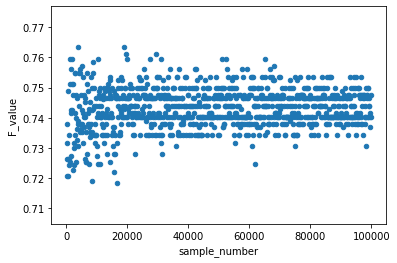

In [62]:
pd.DataFrame(list_f_val, columns=['sample_number', 'F_value']).plot(kind='scatter', x='sample_number', y='F_value')